# Optical Character Recognition
## Department of Electrical and Computer Engineering, University of Thessaly, Volos, Greece
## Project: IoT OCR
In this project, we implement an alternative way from the easy [OCR](https://github.com/JaidedAI/EasyOCR).This OCR deep Neural Network model is very officient but slow.For a single image it needs approximately 1 minute to run(in CPU).

> **Note**  Here is a quick run of the easy OCR model[Run](https://colab.research.google.com/drive/1Cjl0eTM_lhJUIdZahp6iI_332j5sAWRR) .

### Introduction
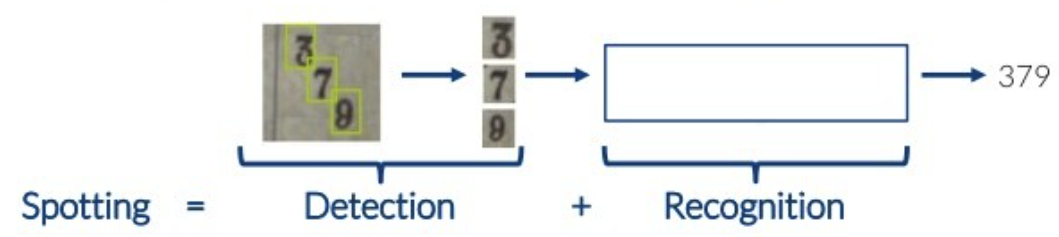

### Detection
Detection is the unit where we detect potencial characters. The detected bounding boxes might contain some ourliers. This unit is divided into two fundamental steps: 
- **STEP 1** Contains the [MSER](https://docs.opencv.org/3.4/d3/d28/classcv_1_1MSER.html) algorithm, to extract maximally stable extremal regions from the source image. 
- **STEP 2** Contains an [Non-Maximum Suppression](https://www.pyimagesearch.com/2015/02/16/faster-non-maximum-suppression-python/) aproach along with some other algorithms that can reduce the number of the extracted regions.
#### How it works
Detection is based on an region detector called Extremal Region (ER), which is basically the superset of famous region detector MSER. We use ER to find text candidates. The ER is extracted by Linear-time MSER algorithm witch is provided by OpenCV. The pitfall of ER is repeating detection, therefore we remove most of repeating ERs with non-maximum suppression and the other algorithms. 

### Recognition 
Recognition unit contains a classifier that can classify the isolated regions but also determine if the regions are characters or not. This classifier contains following aspects :
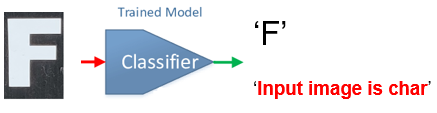
- **1)** Neural Network trained with [Chars74k](http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/).
- **2)** Can classify 62 classes (0-9,A-Z,a-z).
- **3)** GAN trained with semi-supervised approach.
- **4)** Inspired by this paper : [“Improved Techniques for Training GANs”](https://arxiv.org/pdf/1606.03498.pdf).


### System information
- Tensorflow version: 1.2.0

- Python version: 3.7

- OpenCV version: 3.4.15

- CUDA/cuDNN version: N/A

- MSER,pandas,matplotlib etc

[Here](https://www.pugetsystems.com/labs/hpc/How-to-Install-TensorFlow-with-GPU-Support-on-Windows-10-Without-Installing-CUDA-UPDATED-1419/) is a good user-guid about how to install Tensorflow with both CPU or GPU support on windows 10.

### Project Overview 
Our OCR system is developed to run on a standard local hardware and can be trained on a custom dataset for specific applications. We also implement our approach on ZedBoard platform to utilize its DPU. For this reason we call our application ZOCR. It computes 90% less linear operations per image and the time taken is significantly lower than others, like the easyOCR. ZOCR's end-to-end text detection accuracy on ICDAR dataset 2004 is roughly 70%, and end-to-end recognition accuracy is about 84,4%. 

In [1]:
proj_directory = '/Users/Theologis/Desktop/CAS Lab/OCR/' ##TOCHANGE...
%cd $proj_directory

###Step 1 
from utils import MSER
#image_name='img_33.jpg' ##TOCHANGE...
#img_dir = proj_directory + "images/" + 'ICDAR2015_test/' + image_name
img_dir = proj_directory + "images/" + 'img_50.jpg' 

start_point,end_point = MSER(img_dir = img_dir)


C:\Users\Theologis\Desktop\CAS Lab\OCR


<Figure size 1800x1800 with 1 Axes>

Detected boxes: 756


### Step 1 conclution 
We can see that MSER detected the letters in the image but with some outliers.We can see also that MSER find multiple detections of the same object. Non-Maximum suppression is a way to make sure that the algorithm detects this object only ones. In the next box we run the second step.

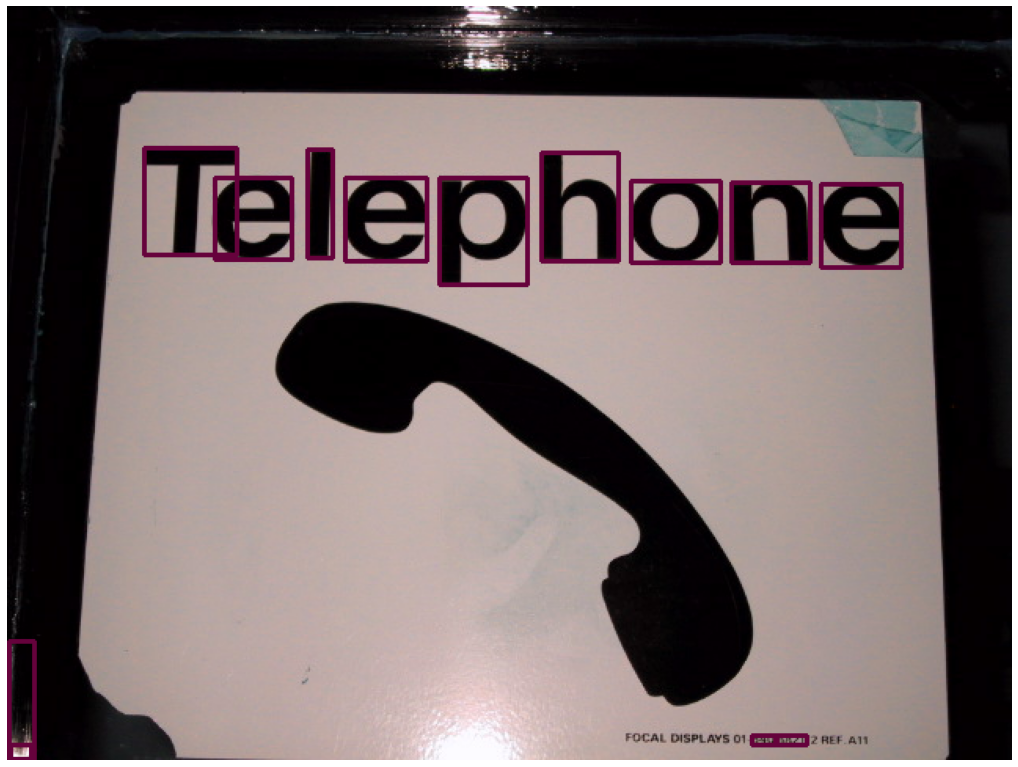

Detected boxes: 13


In [2]:
#STEP 2
from extract_letters import FindLetters
from utils import BoundingBoxes_from_Points

start_point,end_point = FindLetters(start_point,end_point,img_dir)

We can see that the bonding boxes decreased expodentially.But we have also a few noise.We can see some in the right corner.

# STEP 5 Load the Classifier

## Classifier
In this step we are going to load the model that was introduced in OCR_Naural_Net notebook. We load the model.pb that contains the weights in a pure Tenssorflow 1.12.0 model.And then run the OCR.



INFO:tensorflow:Restoring parameters from ./savedmodel\variables\variables


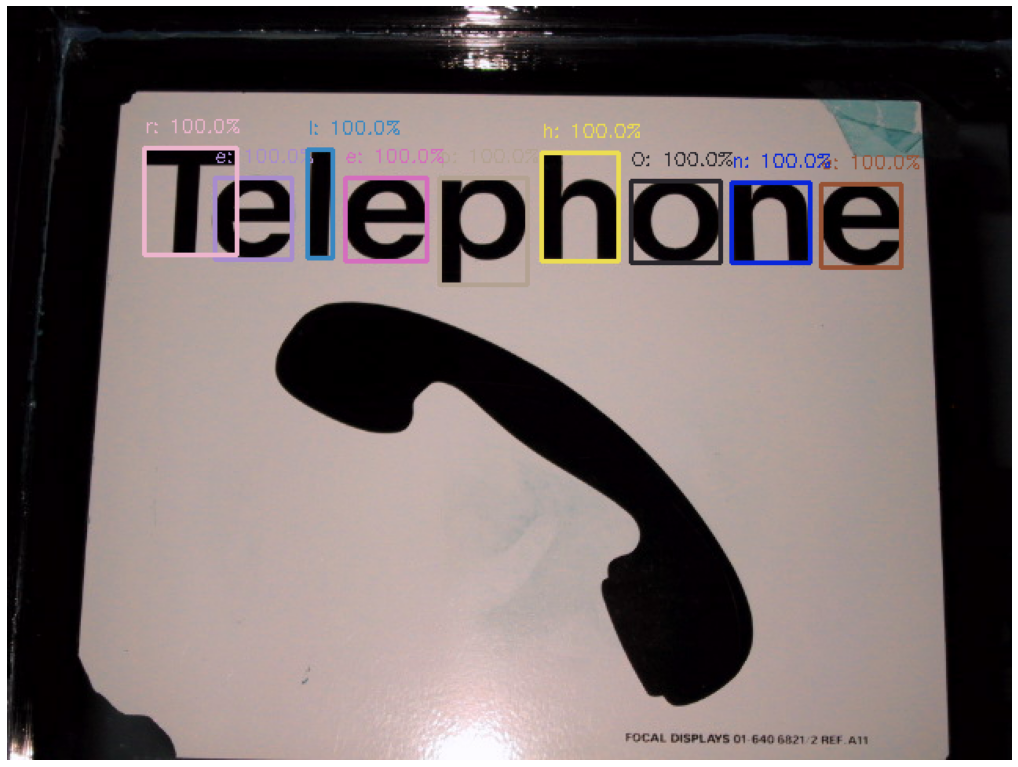

In [4]:
from OCR import do_OCR
image_path = img_dir
##Step 5 OCR
do_OCR(start_point,end_point,image_path,input_size=32)